# Testes iniciais modelos de regressão

## Preparando o ambiente

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNetCV, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [18]:
SEED = 42
np.random.seed(SEED)

## Carregando os dados

In [19]:
dataset = pd.read_csv('../data/feature_engineering/cat_country.csv')
dataset.head()

,country,region,score,gdp,social_support,hle,freedom,generosity,corruption,positive_affect,negative_affect,year,cat_region,cat_country
0,afghanistan,asia,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195,2008,0,0
1,afghanistan,asia,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092,2009,0,0
2,afghanistan,asia,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324,2010,0,0
3,afghanistan,asia,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175,2011,0,0
4,afghanistan,asia,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919,2012,0,0


In [20]:
dataset.corr()

,score,gdp,social_support,hle,freedom,generosity,corruption,positive_affect,negative_affect,year,cat_region,cat_country
score,1.000000,0.786760,0.710903,0.742423,0.524903,0.171968,-0.423622,0.526402,-0.305731,0.037531,0.059246,-0.011848
gdp,0.786760,1.000000,0.689782,0.834704,0.362880,-0.013398,-0.339782,0.299136,-0.224299,0.074857,-0.051085,-0.005553
social_support,0.710903,0.689782,1.000000,0.620191,0.412178,0.049919,-0.220744,0.429108,-0.403003,-0.006371,-0.008218,0.132656
hle,0.742423,0.834704,0.620191,1.000000,0.388563,0.007027,-0.320664,0.309012,-0.147952,0.165953,-0.158477,-0.033011
freedom,0.524903,0.362880,0.412178,0.388563,1.000000,0.305791,-0.472828,0.602394,-0.267733,0.227725,0.060306,0.037648
generosity,0.171968,-0.013398,0.049919,0.007027,0.305791,1.000000,-0.278279,0.334181,-0.077491,-0.036023,0.057679,0.081996
corruption,-0.423622,-0.339782,-0.220744,-0.320664,-0.472828,-0.278279,1.000000,-0.285842,0.259155,-0.074125,-0.252090,-0.022954
positive_affect,0.526402,0.299136,0.429108,0.309012,0.602394,0.334181,-0.285842,1.000000,-0.372828,-0.001139,0.075334,0.039767
negative_affect,-0.305731,-0.224299,-0.403003,-0.147952,-0.267733,-0.077491,0.259155,-0.372828,1.000000,0.209917,0.038011,-0.118912
year,0.037531,0.074857,-0.006371,0.165953,0.227725,-0.036023,-0.074125,-0.001139,0.209917,1.000000,0.038731,-0.007947


### Separação simples de treino e teste

In [21]:
columns_to_drop_x = ['country', 'region', 'score', 'year', 'cat_country']

As colunas acima que serão removidas dos dados de treinamento são os dados categóricos não transformados, o score em si e o ano de ocorrência do mesmo, visto que a proposta do projeto é identificar um padrão independente do tempo.

In [22]:
X = dataset.drop(columns_to_drop_x, axis=1)
y = dataset['score']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

A separação acima é simples apenas para validação geral dos modelos. Não deve ser utilizada para o modelo final.

## Treinamento inicial de modelos

Esses treinamentos não envolvem nenhum tipo de normalização dos dados, apenas um teste de seus comportamentos ante os dados.

In [23]:
def test_models(models, x_train, x_test, y_train, y_test, plot=True):
    best_model = {
        'score': 0
    }

    result = []

    for model in models:
        model_name = type(model).__name__        
        model.fit(x_train, y_train)        
        score = model.score(x_test, y_test)        

        if(score > best_model['score']):
            best_model['model'] = model
            best_model['name'] = model_name
            best_model['score'] = score

        result.append({
            'model': model_name,
            'score': score
        })

    if(plot):
        y_pred = best_model['model'].fit(x_train, y_train).predict(x_test)
        best_model_name = best_model['name']
        sns.set(rc={'figure.figsize':(15,10)})
        sns.regplot(x = y_test, y = y_pred)
        sns.lineplot(x = y_test, y = y_test)
        plt.title(f'Predições do modelo ({best_model_name}) vs Dado real', fontsize=20)
        plt.xlabel('Score real')
        plt.ylabel('Score predito')
        plt.legend(['Score', 'Tendência predita', 'Intervalo de confiança', 'Resultado esperado'])
        plt.show()

    return result

### Modelos lineares

In [24]:
def run_linear_models(x_train, x_test, y_train, y_test):        
    models = [LinearRegression(), ElasticNetCV(), BayesianRidge()]
    return test_models(models, x_train, x_test, y_train, y_test)

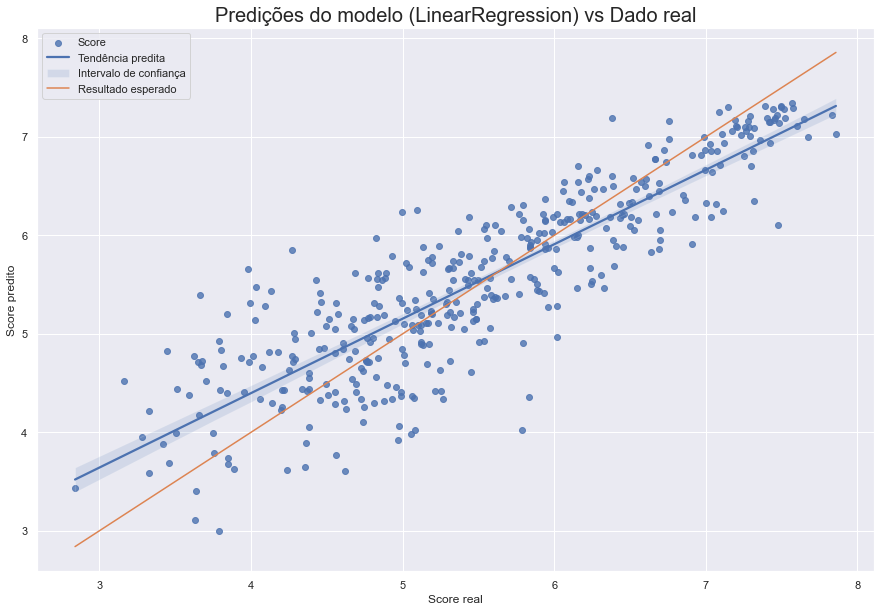

[{'model': 'LinearRegression', 'score': 0.760282388684818},
 {'model': 'ElasticNetCV', 'score': 0.7400631834654183},
 {'model': 'BayesianRidge', 'score': 0.760180103311644}]

In [25]:
run_linear_models(x_train, x_test, y_train, y_test)

### Modelos não lineares

In [26]:
def run_non_linear_models(x_train, x_test, y_train, y_test, plot=True):        
    models = [SVR(C=100, gamma=0.1), KNeighborsRegressor(n_neighbors=5), RandomForestRegressor(random_state=SEED), DecisionTreeRegressor(random_state=SEED)]
    return test_models(models, x_train, x_test, y_train, y_test, plot)

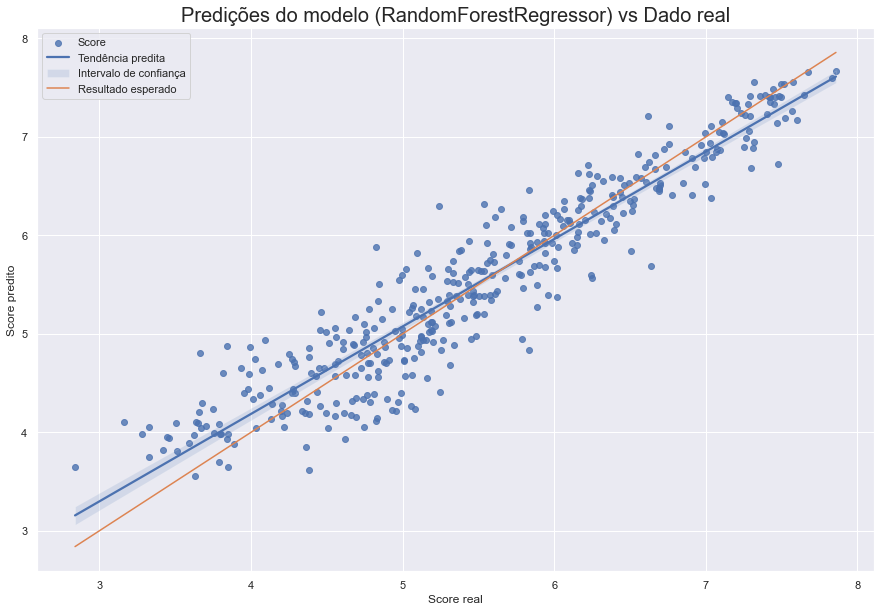

[{'model': 'SVR', 'score': 0.8664542976569287},
 {'model': 'KNeighborsRegressor', 'score': 0.8323086475316855},
 {'model': 'RandomForestRegressor', 'score': 0.8911564212356093},
 {'model': 'DecisionTreeRegressor', 'score': 0.7970575336439938}]

In [27]:
run_non_linear_models(x_train, x_test, y_train, y_test)

Para o caso identificado aqui, possivelmente um modelo não linear tenha uma melhor performance. No entanto é necessário cuidar e validar o overfitting.

## Custom Cross Validation

Realizando validação cruzada customizada para o modelo de regressão, baseada no ano.

In [28]:
current_year = dataset['year'].min()
last_year = dataset['year'].max()
years = list(range(current_year, last_year+1))

In [29]:
results = []
for year in years:
    to_train = dataset.query(f'year != {year}')
    to_test = dataset.query(f'year == {year}')
    X = to_train.drop(columns_to_drop_x, axis=1)
    y = to_train['score']
    X_test = to_test.drop(columns_to_drop_x, axis=1)
    y_test = to_test['score']
    scores = run_non_linear_models(X, X_test, y, y_test, plot=False)
    result = {
        'year': year        
    }
    for score in scores:
        result[score['model']] = score['score']
    results.append(result)

results = pd.DataFrame(results)     

In [30]:
results

,year,SVR,KNeighborsRegressor,RandomForestRegressor,DecisionTreeRegressor
0,2005,0.764478,0.608792,0.693772,0.462976
1,2006,0.814464,0.776155,0.854160,0.727282
2,2007,0.858985,0.776873,0.844878,0.750816
3,2008,0.886216,0.871192,0.889624,0.780339
4,2009,0.831424,0.807473,0.818805,0.663011
5,2010,0.890941,0.875629,0.899019,0.820755
6,2011,0.856556,0.831911,0.861856,0.724360
7,2012,0.859739,0.861863,0.908532,0.771441
8,2013,0.889151,0.865794,0.888487,0.782109
9,2014,0.884069,0.871221,0.885670,0.813597


In [31]:
results.drop(columns=['year']).describe()

,SVR,KNeighborsRegressor,RandomForestRegressor,DecisionTreeRegressor
count,17.000000,17.000000,17.000000,17.000000
mean,0.868064,0.831819,0.878784,0.768706
std,0.038199,0.066482,0.057109,0.095294
min,0.764478,0.608792,0.693772,0.462976
25%,0.856556,0.821464,0.861856,0.750816
50%,0.884069,0.860066,0.898523,0.788462
75%,0.890941,0.871192,0.908532,0.819817
max,0.913311,0.889128,0.956590,0.889324


### Erro por região do mundo

In [42]:
def adjusted_r_squared(r2, data):
    size = len(data)
    return 1-(1-r2)*(size-1)/(size-len(data.columns)-1)

In [53]:
regions = dataset['region'].unique()
region_test_dataset = dataset.drop(columns=['country','year', 'cat_region', 'cat_country'])
results = []
for region in regions:
    to_train = region_test_dataset[region_test_dataset['region'] != region]
    to_test = region_test_dataset[region_test_dataset['region'] == region]
    X = to_train.drop(columns=['score', 'region'])
    y = to_train['score']    
    y_test = to_test['score']
    X_test = to_test.drop(columns=['score', 'region'])
    print(f'Region: {region}, training size: {len(to_train)}, test size: {len(to_test)}')        
    score = KNeighborsRegressor(n_neighbors=5).fit(X, y).score(X_test, y_test)
    adj_score = adjusted_r_squared(score, X_test)
    results.append({
        'region': region,
        'r2': score,
        'adj_r2': adj_score
    })
results = pd.DataFrame(results)
results

Region: asia, training size: 1777, test size: 321
Region: eastern europe, training size: 1902, test size: 196
Region: northern africa, training size: 2042, test size: 56
Region: sub-saharan africa, training size: 1635, test size: 463
Region: latin amer. and carib, training size: 1789, test size: 309
Region: c.w. of ind. states, training size: 1916, test size: 182
Region: oceania, training size: 2068, test size: 30
Region: western europe, training size: 1806, test size: 292
Region: near east, training size: 1927, test size: 171
Region: northern america, training size: 2066, test size: 32
Region: baltics, training size: 2052, test size: 46


,region,r2,adj_r2
0,asia,0.150213,0.128424
1,eastern europe,0.088633,0.049644
2,northern africa,-0.601122,-0.873653
3,sub-saharan africa,-0.393935,-0.418498
4,latin amer. and carib,-0.613331,-0.656353
5,c.w. of ind. states,-0.542212,-0.613528
6,oceania,-2.000113,-3.143013
7,western europe,0.244880,0.223534
8,near east,0.587021,0.566627
9,northern america,-7.821380,-10.889687


A ausência da região do mundo impactou bastante o score e treinar sem aquela região trouxe baixos scores na validação com a mesma. Isso significa que exista uma importância da região.